In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = np.load('data/test_performance.npz', allow_pickle=True)

In [29]:
print(data.files)

['gptturbo_multiarith', 'textdavinci_multiarith', 'gptturbo_aquarat', 'gptturbo_svamp', 'textdavinci_aquarat']


In [47]:
df = pd.DataFrame(data["gptturbo_aquarat"], columns=[1, 2, 4], index=[
    "CoT", "SymPy"])

In [48]:
df2 = pd.DataFrame(data["textdavinci_aquarat"], columns=[1, 2, 4], index=[
    "CoT","SymPy"])

In [49]:
df = df.reset_index(names=['Prompting Method']).melt(id_vars=['Prompting Method'], value_vars=[
    1, 2, 4], var_name='Shots', value_name='Accuracy')

In [50]:
df2 = df2.reset_index(names=['Prompting Method']).melt(id_vars=['Prompting Method'], value_vars=[
    1, 2, 4], var_name='Shots', value_name='Accuracy')

In [51]:
df["Shots"] = df["Shots"].astype(str)
df["Model"] = "gpt-3.5-turbo"
df2["Shots"] = df2["Shots"].astype(str)
df2["Model"] = "text-davinci-002"

# concatenate dataframes and add column for dataset
df = pd.concat([df, df2])

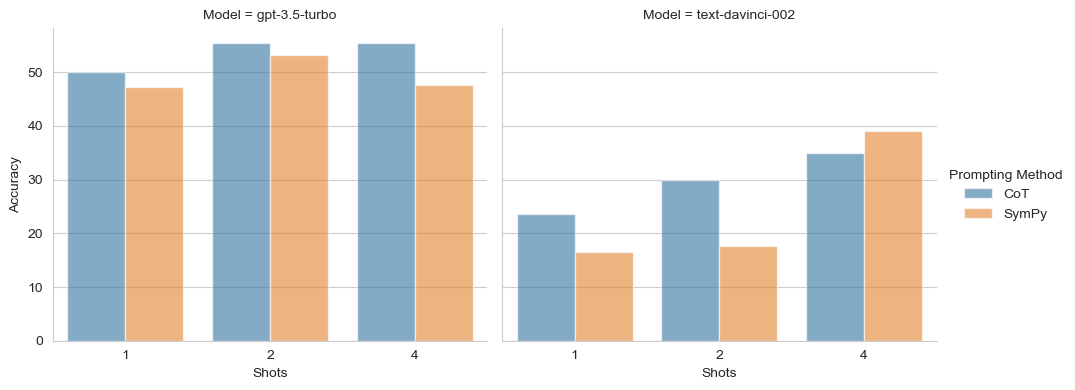

In [53]:
sns.set_style("whitegrid")

sns.catplot(data=df, x='Shots', y='Accuracy', hue='Prompting Method', col='Model', kind='bar', alpha=0.6, height=4, aspect=1.2, hue_order=["CoT", "SymPy"])


In [54]:
df = pd.DataFrame(data['gptturbo_svamp'], columns=[1, 2, 4, 8], index=[
    "CoT", "VarCoT", "PyCot", "SymPy"])


In [55]:
# melt dataframe
df = df.reset_index(names=['Prompting Method']).melt(id_vars=['Prompting Method'], value_vars=[
    1, 2, 4, 8], var_name='Shots', value_name='Accuracy')

In [56]:
df["Shots"] = df["Shots"].astype(str)

In [57]:
df["Model"] = "gpt-3.5-turbo"

(60.0, 90.0)

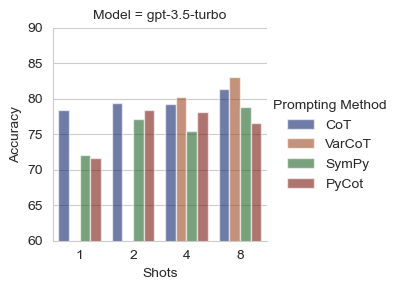

In [61]:
sns.catplot(data=df, x='Shots', y='Accuracy', hue='Prompting Method', col='Model',
            kind='bar', alpha=0.6, height=3, aspect=1, hue_order=["CoT", "VarCoT", "SymPy", "PyCot"], palette="dark")

plt.ylim(60, 90)